In [ ]:
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
#Import data
seattle_weather = pd.read_csv("seattle-weather.csv")
%sql
select * from abc;

In [ ]:
#Check data
seattle_weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
#Extract year, month, month year
import datetime

seattle_weather['year'] = pd.DatetimeIndex(seattle_weather['date']).year
seattle_weather['month'] = pd.DatetimeIndex(seattle_weather['date']).month
seattle_weather['month_name'] = pd.DatetimeIndex(seattle_weather['date']).strftime("%b")
seattle_weather["month-year"] = pd.to_datetime(seattle_weather["date"]).dt.strftime('%b-%Y')


In [ ]:
#checking data
seattle_weather

,date,precipitation,temp_max,temp_min,wind,weather,year,month,month_name,month-year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,Jan,Jan-2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,Jan,Jan-2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,Jan,Jan-2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,Jan,Jan-2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,Jan,Jan-2012
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015,12,Dec,Dec-2015
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015,12,Dec,Dec-2015
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,Dec,Dec-2015
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12,Dec,Dec-2015


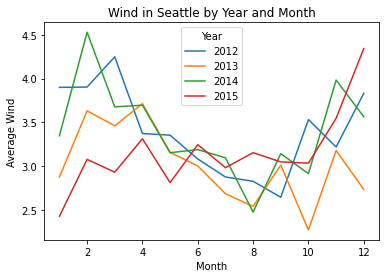

In [ ]:
# Generate Wind chart
# Group By wind
df_wind = seattle_weather.groupby(["year", "month"]).mean()["wind"].reset_index()

# line chart using temp_max, year, month
fig, ax = plt.subplots()
for year in df_wind ["year"].unique():
    year_data = df_wind [df_wind ["year"] == year]
    ax.plot(year_data["month"], year_data["wind"], label=year)

ax.set_xlabel("Month")
ax.set_ylabel("Average Wind")
ax.set_title("Wind in Seattle by Year and Month")
ax.legend(title="Year")
plt.show()

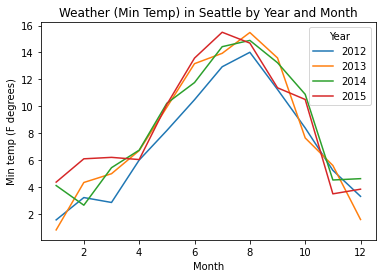

In [ ]:
# Generate min temp chart
# Group By temp_min
df_temp_min = seattle_weather.groupby(["year", "month"]).mean()["temp_min"].reset_index()

# line chart using temp_max, year, month
fig, ax = plt.subplots()
for year in df_temp_min ["year"].unique():
    year_data = df_temp_min [df_temp_min ["year"] == year]
    ax.plot(year_data["month"], year_data["temp_min"], label=year)

ax.set_xlabel("Month")
ax.set_ylabel("Min temp (F degrees)")
ax.set_title("Weather (Min Temp) in Seattle by Year and Month")
ax.legend(title="Year")
plt.show()

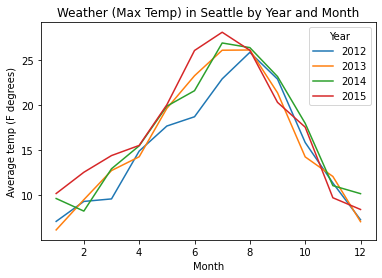

In [ ]:
# Generate max temp chart
# Group the data by year and month and calculate the mean temp_max for each group
df_temp_max = seattle_weather.groupby(["year", "month"]).mean()["temp_max"].reset_index()

# line chart using temp_max, year, month
fig, ax = plt.subplots()
for year in df_temp_max ["year"].unique():
    year_data = df_temp_max [df_temp_max ["year"] == year]
    ax.plot(year_data["month"], year_data["temp_max"], label=year)

ax.set_xlabel("Month")
ax.set_ylabel("Average temp (F degrees)")
ax.set_title("Weather (Max Temp) in Seattle by Year and Month")
ax.legend(title="Year")
plt.show()